# Exercise: Exact quantum dyanmics for 1D 

## Different potential and results

* Box potential

![SegmentLocal](./gif/pot_1.gif "segment")

* Morse potential

![SegmentLocal](./gif/pot_2.gif "segment")

* Harmonic potential

![SegmentLocal](./gif/pot_3.gif "segment")

In [40]:
from widget_code_input import WidgetCodeInput

code_widget = WidgetCodeInput(
    function_name = "generate_potential_file",
    function_parameters = "xmin, xmax, num",
    docstring="""
    A function to write the potential file for the SOFT program. 
    
    :xmin is the left range of the potential.
    :xmax is the right range of the potential.
    :num is the number of the points. 
    """,
    
    function_body="# Input here your solution\n"

)

display(code_widget)

WidgetCodeInput(docstring='\n    A function to write the potential file for the SOFT program. \n    \n    :xmi…

## Run the SOFT program

1. Box potential.
2. Morse potential.
3. Harmonic potential.

In [41]:
import ipywidgets as widgets
import os
import subprocess
from time import *
from ipywidgets import HBox, VBox, HTML
import shlex
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, clear_output
from IPython.display import Image

out = widgets.Output()

def on_savefig(b):
    fig1 = plt.figure(figsize=(14,6))

    fpot = open("potential.dat","r");
    lines = fpot.readlines();

    x1 = [];
    y1 = [];

    for line in lines:
        if len(line.split()) == 3:
            a = line.split()[0]
            b = line.split()[1]
            c = line.split()[2]
            x1.append(float(b))
            y1.append(float(c)/10.0)

    plt.plot(x1, y1, 'green',label='potential')

    fpsi = open("final_psi.dat", "r");
    lines = fpsi.readlines();

    a1 = [];
    b1 = [];
    c1 = [];
    d1 = [];

    for line in lines:
        a = line.split()[1]
        b = line.split()[2]
        c = line.split()[3]
        d = line.split()[4]
        a1.append(float(a))
        b1.append(float(b))
        c1.append(float(c))
        d1.append(float(d))

    plt.plot(a1, b1, 'b', label="Psi Real");
    plt.plot(a1, c1, 'r', label="Psi Image"); 
    plt.plot(a1, d1, 'k', label="Psi Square");
    plt.xlim([0, 50])
    plt.ylim([-0.6, 0.6])


    plt.grid()
    plt.legend(fontsize=20)
    plt.savefig("test.pdf")


def on_value_change(change):
    # command = shlex.split(command)
    #out = widgets.Output()
    command = "./SOFT.x " + str(change['new']) + ' 0.01';
    p = subprocess.check_call(command, shell=True)
    p = subprocess.check_call('tail -512 psi.dat > final_psi.dat', shell=True)
    p = subprocess.check_call('./make_gif.sh', shell=True)
    with out:
        out.clear_output(wait=True)
        fig = plt.figure(figsize=(14,6))
        
        fpot = open("potential.dat","r");
        lines = fpot.readlines();
        
        x1 = [];
        y1 = [];
        
        for line in lines:
            if len(line.split()) == 3:
                a = line.split()[0]
                b = line.split()[1]
                c = line.split()[2]
                x1.append(float(b))
                y1.append(float(c)/10.0)
                
        plt.plot(x1, y1, 'green',label='potential')
        
        fpsi = open("final_psi.dat", "r");
        lines = fpsi.readlines();
        
        a1 = [];
        b1 = [];
        c1 = [];
        d1 = [];
        
        for line in lines:
            a = line.split()[1]
            b = line.split()[2]
            c = line.split()[3]
            d = line.split()[4]
            a1.append(float(a))
            b1.append(float(b))
            c1.append(float(c))
            d1.append(float(d))
            
        plt.plot(a1, b1, 'b', label="$\Psi$ Real");
        plt.plot(a1, c1, 'r', label="$\Psi$ Image"); 
        plt.plot(a1, d1, 'k', label="$\Psi^2$");
        plt.xlim([0, 50])
        plt.ylim([-0.6, 0.6])
        
        
        plt.grid()
        plt.legend(fontsize=20)
        plt.show()
            

    
w = widgets.Dropdown(
    options=['None', '1', '2', '3'],
    value='None',
    description='Potential type:',
    disabled=False,
)

w.observe(on_value_change, names='value')
save_button = widgets.Button(description='Save figure')
save_button.on_click(on_savefig)
display(VBox([w, out, save_button]))

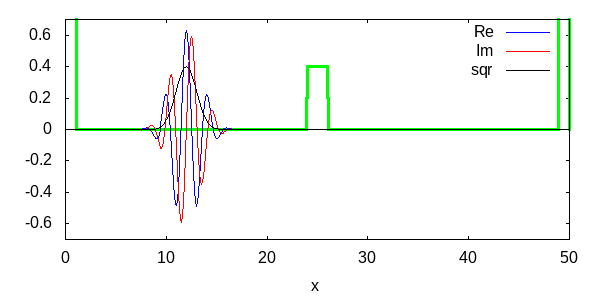

In [39]:
from IPython.display import Image
Image(filename='./result.gif') 